In [459]:
# Import all necesary packages
import pandas as pd
import numpy as np

# from sklearn.metrics.pairwise import nan_euclidean_distances, cosine_similarity
import networkx as nx
import matplotlib.pyplot as plt
import math
from scipy.spatial.distance import euclidean, pdist, squareform

from operator import itemgetter

In [460]:
example = True # Use the example from repo
calculate_csv = True # Calculate similarity matrix, use it and save it
calculate_median = True # Calculate median or set it manually
index_column_name = 'ID'

# Path to dataset which we will be using
if example:
    calculate_csv = False
    calculate_median = False
    dataset_path = './SDD.csv'
    dataset_sim_path = './sim.csv'
else:
    dataset_path = '../../dataset/cleaned_csv_file_25_missing.csv'
    dataset_sim_path = './sim_cars.csv'

In [461]:
if (calculate_csv):
    # Load the dataset   
    data = pd.read_csv('../../dataset/cleaned_csv_file_25.csv')
    
    # Drop ID column
    # normalized Euclidea distance inversely related to the similarity is adopted to measure the similarity between two tuples
    data = data.drop(columns=[index_column_name])
    distance_matrix = squareform(pdist(data, metric='euclidean'))
    distance_df = pd.DataFrame(distance_matrix, index=data.index, columns=data.index)
    distance_df = distance_df.round(3)

In [462]:
def convert_similarity_to_csv(calculate_csv, distance_df, dataset_sim_path):
    """
    This function converts a similarity matrix to a DataFrame and saves it as a CSV file.
    The first two columns are set to zero.

    Parameters:
    calculate_csv (bool): A flag indicating whether to perform the conversion and saving.
    distance_df (DataFrame): The similarity matrix to be converted.
    dataset_sim_path (str): The path where the CSV file should be saved.

    Returns:
    None
    """
    if calculate_csv:
        # Convert the similarity matrix to a DataFrame
        similarity_df = pd.DataFrame(distance_df)
        
        # Rename the columns of the new dataframe
        similarity_df.rename(columns={i: f"x{i+1}" for i in range(similarity_df.shape[1])}, inplace=True)

        # Reindex to start from 1
        similarity_df.index = similarity_df.index + 1
        
        # Insert ID column
        similarity_df.insert(0, 'ID', similarity_df.index.map(lambda x: f"x{x}"))
        
        # Set the first two columns to zero
        similarity_df.iloc[:, 1:3] = 0

        # Save the similarity DataFrame as a CSV file
        similarity_df.to_csv(dataset_sim_path, index=False)

convert_similarity_to_csv(calculate_csv, distance_df, dataset_sim_path)

In [463]:
# Load the similarity matrix from file
df = pd.read_csv(dataset_sim_path)
df

,ID,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14
0,x1,0.0,0.0,0.000,0.000,0.000,0.000,2605.916,2605.916,2605.916,2605.916,3410.933,2627.442,2627.442,1617.495
1,x2,0.0,0.0,3.464,3.464,3.464,3.464,2605.923,2605.923,2605.923,2605.923,3410.945,2627.457,2627.457,1617.486
2,x3,0.0,0.0,0.000,0.000,0.000,0.000,2605.916,2605.916,2605.916,2605.916,3410.933,2627.442,2627.442,1617.495
3,x4,0.0,0.0,0.000,0.000,0.000,0.000,2605.916,2605.916,2605.916,2605.916,3410.933,2627.442,2627.442,1617.495
4,x5,0.0,0.0,0.000,0.000,0.000,0.000,2605.916,2605.916,2605.916,2605.916,3410.933,2627.442,2627.442,1617.495
5,x6,0.0,0.0,0.000,0.000,0.000,0.000,2605.916,2605.916,2605.916,2605.916,3410.933,2627.442,2627.442,1617.495
6,x7,0.0,0.0,2605.916,2605.916,2605.916,2605.916,0.000,0.000,0.000,0.000,806.233,205.554,205.554,4219.731
7,x8,0.0,0.0,2605.916,2605.916,2605.916,2605.916,0.000,0.000,0.000,0.000,806.233,205.554,205.554,4219.731
8,x9,0.0,0.0,2605.916,2605.916,2605.916,2605.916,0.000,0.000,0.000,0.000,806.233,205.554,205.554,4219.731
9,x10,0.0,0.0,2605.916,2605.916,2605.916,2605.916,0.000,0.000,0.000,0.000,806.233,205.554,205.554,4219.731


In [464]:
if (calculate_median):
    # Convert the DataFrame into a single pandas Series
    test = df.copy()
    test = test.drop(columns=[index_column_name])

    melted_df = test.melt()

    # Calculate the median of all values
    med = melted_df['value'].median()
else: 
    med = 0.785
    
print("Median of all values in the DataFrame:", med)

Median of all values in the DataFrame: 806.6185


In [465]:
df[index_column_name] = df.index + 1
df.set_index(index_column_name, inplace=True)
df

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14
ID,,,,,,,,,,,,,,
1,0.0,0.0,0.000,0.000,0.000,0.000,2605.916,2605.916,2605.916,2605.916,3410.933,2627.442,2627.442,1617.495
2,0.0,0.0,3.464,3.464,3.464,3.464,2605.923,2605.923,2605.923,2605.923,3410.945,2627.457,2627.457,1617.486
3,0.0,0.0,0.000,0.000,0.000,0.000,2605.916,2605.916,2605.916,2605.916,3410.933,2627.442,2627.442,1617.495
4,0.0,0.0,0.000,0.000,0.000,0.000,2605.916,2605.916,2605.916,2605.916,3410.933,2627.442,2627.442,1617.495
5,0.0,0.0,0.000,0.000,0.000,0.000,2605.916,2605.916,2605.916,2605.916,3410.933,2627.442,2627.442,1617.495
6,0.0,0.0,0.000,0.000,0.000,0.000,2605.916,2605.916,2605.916,2605.916,3410.933,2627.442,2627.442,1617.495
7,0.0,0.0,2605.916,2605.916,2605.916,2605.916,0.000,0.000,0.000,0.000,806.233,205.554,205.554,4219.731
8,0.0,0.0,2605.916,2605.916,2605.916,2605.916,0.000,0.000,0.000,0.000,806.233,205.554,205.554,4219.731
9,0.0,0.0,2605.916,2605.916,2605.916,2605.916,0.000,0.000,0.000,0.000,806.233,205.554,205.554,4219.731


In [466]:
# Convert into a numpy array and fixing the threshold
sim_matrix_numpy = np.array(df)
sim_matrix_numpy

array([[0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 2.605916e+03, 2.605916e+03,
        2.605916e+03, 2.605916e+03, 3.410933e+03, 2.627442e+03,
        2.627442e+03, 1.617495e+03],
       [0.000000e+00, 0.000000e+00, 3.464000e+00, 3.464000e+00,
        3.464000e+00, 3.464000e+00, 2.605923e+03, 2.605923e+03,
        2.605923e+03, 2.605923e+03, 3.410945e+03, 2.627457e+03,
        2.627457e+03, 1.617486e+03],
       [0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 2.605916e+03, 2.605916e+03,
        2.605916e+03, 2.605916e+03, 3.410933e+03, 2.627442e+03,
        2.627442e+03, 1.617495e+03],
       [0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 2.605916e+03, 2.605916e+03,
        2.605916e+03, 2.605916e+03, 3.410933e+03, 2.627442e+03,
        2.627442e+03, 1.617495e+03],
       [0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00

In [467]:
def binary_threshold_similarity(sim_matrix_numpy, med):
    """
    This function applies a binary threshold to a similarity matrix. 
    Values equal to 1 are replaced with 0, values above the threshold 'med' are replaced with 1,
    and all other values are replaced with 0.

    Parameters:
    sim_matrix_numpy (numpy array): The similarity matrix to apply the threshold to.
    med (float): The threshold value.

    Returns:
    similarity_thres (list): The thresholded similarity matrix.
    """

    similarity_thres = [[0 if value == 1 else (1 if value >= med else 0) for value in row] for row in sim_matrix_numpy]

    return similarity_thres

similarity_thres = binary_threshold_similarity(sim_matrix_numpy, med)

In [468]:
# Create a new dataframe using the boolean matrix
sim_bool_matrix_df = pd.DataFrame(similarity_thres)
sim_bool_matrix_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0,0,0,0,0,0,1,1,1,1,1,1,1,1
1,0,0,0,0,0,0,1,1,1,1,1,1,1,1
2,0,0,0,0,0,0,1,1,1,1,1,1,1,1
3,0,0,0,0,0,0,1,1,1,1,1,1,1,1
4,0,0,0,0,0,0,1,1,1,1,1,1,1,1
5,0,0,0,0,0,0,1,1,1,1,1,1,1,1
6,0,0,1,1,1,1,0,0,0,0,0,0,0,1
7,0,0,1,1,1,1,0,0,0,0,0,0,0,1
8,0,0,1,1,1,1,0,0,0,0,0,0,0,1
9,0,0,1,1,1,1,0,0,0,0,0,0,0,1


In [469]:
# Rename the columns of the new dataframe.
column_mapping = {i: f"X{i+1}" for i in range(sim_bool_matrix_df.shape[1])}
sim_bool_matrix_df.rename(columns=column_mapping, inplace=True)

# Reindex to start from 1
sim_bool_matrix_df.index = sim_bool_matrix_df.index + 1
sim_bool_matrix_df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14
1,0,0,0,0,0,0,1,1,1,1,1,1,1,1
2,0,0,0,0,0,0,1,1,1,1,1,1,1,1
3,0,0,0,0,0,0,1,1,1,1,1,1,1,1
4,0,0,0,0,0,0,1,1,1,1,1,1,1,1
5,0,0,0,0,0,0,1,1,1,1,1,1,1,1
6,0,0,0,0,0,0,1,1,1,1,1,1,1,1
7,0,0,1,1,1,1,0,0,0,0,0,0,0,1
8,0,0,1,1,1,1,0,0,0,0,0,0,0,1
9,0,0,1,1,1,1,0,0,0,0,0,0,0,1
10,0,0,1,1,1,1,0,0,0,0,0,0,0,1


In [470]:
# Create an index column to get the label in the desired format
sim_bool_matrix_df['DOC2'] = (sim_bool_matrix_df.index)
sim_bool_matrix_df['DOC2'] = sim_bool_matrix_df['DOC2'].apply(lambda x: f"X{x}")
sim_bool_matrix_df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,DOC2
1,0,0,0,0,0,0,1,1,1,1,1,1,1,1,X1
2,0,0,0,0,0,0,1,1,1,1,1,1,1,1,X2
3,0,0,0,0,0,0,1,1,1,1,1,1,1,1,X3
4,0,0,0,0,0,0,1,1,1,1,1,1,1,1,X4
5,0,0,0,0,0,0,1,1,1,1,1,1,1,1,X5
6,0,0,0,0,0,0,1,1,1,1,1,1,1,1,X6
7,0,0,1,1,1,1,0,0,0,0,0,0,0,1,X7
8,0,0,1,1,1,1,0,0,0,0,0,0,0,1,X8
9,0,0,1,1,1,1,0,0,0,0,0,0,0,1,X9
10,0,0,1,1,1,1,0,0,0,0,0,0,0,1,X10


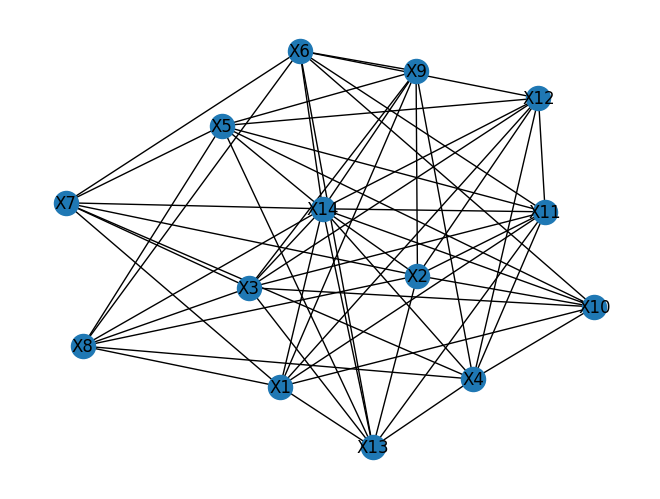

In [471]:
# Plotting the network 

stacked = sim_bool_matrix_df.set_index(['DOC2']).stack()
stacked = stacked[stacked==1]
edges = stacked.index.tolist()

# Edges
G = nx.Graph(edges)
# Add nodes from the index and columns of the DataFrame
G.add_nodes_from(sim_bool_matrix_df.set_index('DOC2').index)
G.add_nodes_from(sim_bool_matrix_df.set_index('DOC2').columns)

# Add edges
G.add_edges_from(edges)

top_nodes = set(sim_bool_matrix_df.set_index('DOC2').columns)

# Project the bipartite graph
Gp = nx.bipartite.projected_graph(G, top_nodes)
Gp.edges()

nx.draw(G, with_labels=True)
plt.show()


In [472]:
sim_bool_matrix_df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,DOC2
1,0,0,0,0,0,0,1,1,1,1,1,1,1,1,X1
2,0,0,0,0,0,0,1,1,1,1,1,1,1,1,X2
3,0,0,0,0,0,0,1,1,1,1,1,1,1,1,X3
4,0,0,0,0,0,0,1,1,1,1,1,1,1,1,X4
5,0,0,0,0,0,0,1,1,1,1,1,1,1,1,X5
6,0,0,0,0,0,0,1,1,1,1,1,1,1,1,X6
7,0,0,1,1,1,1,0,0,0,0,0,0,0,1,X7
8,0,0,1,1,1,1,0,0,0,0,0,0,0,1,X8
9,0,0,1,1,1,1,0,0,0,0,0,0,0,1,X9
10,0,0,1,1,1,1,0,0,0,0,0,0,0,1,X10


In [473]:
# Reading the original dataset and performing the same to create labels and reindex.
dataset_with_data = pd.read_csv(dataset_path)
if (not example):
    dataset_with_data = dataset_with_data.drop('ID', axis=1)

# Reindex to start from 1
dataset_with_data.index = dataset_with_data.index + 1
dataset_with_data

,year,engine_cc,cylinder,valves_per_cylinder,power_ps,torque_nm,engine_compression,doors,hwy,mixed,city,fuel_cap_l
1,2022.0,3600,6.0,4.0,323.0,278.0,11.5,2.0,28.0,20.0,17.0,19.0
2,2022.0,3600,6.0,4.0,323.0,278.0,11.5,2.0,30.0,22.0,19.0,19.0
3,2022.0,3600,6.0,4.0,323.0,278.0,11.5,2.0,28.0,20.0,17.0,19.0
4,2022.0,3600,6.0,4.0,323.0,278.0,11.5,2.0,28.0,20.0,17.0,19.0
5,2022.0,3600,6.0,4.0,323.0,278.0,11.5,2.0,28.0,20.0,17.0,19.0
6,2022.0,3600,6.0,4.0,323.0,278.0,11.5,2.0,28.0,20.0,17.0,19.0
7,2022.0,6200,8.0,2.0,426.0,420.0,10.7,2.0,24.0,19.0,16.0,19.0
8,2022.0,6200,8.0,2.0,426.0,420.0,10.7,2.0,24.0,19.0,16.0,19.0
9,2022.0,6200,8.0,2.0,426.0,420.0,10.7,2.0,24.0,19.0,16.0,19.0
10,2022.0,6200,8.0,2.0,426.0,420.0,10.7,2.0,24.0,19.0,16.0,19.0


In [474]:
# Create an index column to get the label in the desired format
dataset_with_data['DOC2'] = (dataset_with_data.index)
dataset_with_data['DOC2'] = dataset_with_data['DOC2'].apply(lambda x: f"X{x}")
dataset_with_data

,year,engine_cc,cylinder,valves_per_cylinder,power_ps,torque_nm,engine_compression,doors,hwy,mixed,city,fuel_cap_l,DOC2
1,2022.0,3600,6.0,4.0,323.0,278.0,11.5,2.0,28.0,20.0,17.0,19.0,X1
2,2022.0,3600,6.0,4.0,323.0,278.0,11.5,2.0,30.0,22.0,19.0,19.0,X2
3,2022.0,3600,6.0,4.0,323.0,278.0,11.5,2.0,28.0,20.0,17.0,19.0,X3
4,2022.0,3600,6.0,4.0,323.0,278.0,11.5,2.0,28.0,20.0,17.0,19.0,X4
5,2022.0,3600,6.0,4.0,323.0,278.0,11.5,2.0,28.0,20.0,17.0,19.0,X5
6,2022.0,3600,6.0,4.0,323.0,278.0,11.5,2.0,28.0,20.0,17.0,19.0,X6
7,2022.0,6200,8.0,2.0,426.0,420.0,10.7,2.0,24.0,19.0,16.0,19.0,X7
8,2022.0,6200,8.0,2.0,426.0,420.0,10.7,2.0,24.0,19.0,16.0,19.0,X8
9,2022.0,6200,8.0,2.0,426.0,420.0,10.7,2.0,24.0,19.0,16.0,19.0,X9
10,2022.0,6200,8.0,2.0,426.0,420.0,10.7,2.0,24.0,19.0,16.0,19.0,X10


In [475]:
# Split the null values and create a new dataframe using the similarity boolean matrix.
null_data = dataset_with_data[dataset_with_data.isnull().any(axis=1)]
similarity_bool = sim_bool_matrix_df.copy()
similarity_bool.set_index('DOC2',inplace=True)

null_data


,year,engine_cc,cylinder,valves_per_cylinder,power_ps,torque_nm,engine_compression,doors,hwy,mixed,city,fuel_cap_l,DOC2
13,2022.0,6200,8.0,2.0,580.0,556.0,9.1,2.0,19.0,16.0,14.0,NaN,X13
14,NaN,2000,4.0,4.0,131.0,139.0,9.7,4.0,26.0,25.0,24.0,NaN,X14


In [476]:
# Reset the index
similarity_bool.reset_index(inplace=True)
similarity_bool

,DOC2,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14
0,X1,0,0,0,0,0,0,1,1,1,1,1,1,1,1
1,X2,0,0,0,0,0,0,1,1,1,1,1,1,1,1
2,X3,0,0,0,0,0,0,1,1,1,1,1,1,1,1
3,X4,0,0,0,0,0,0,1,1,1,1,1,1,1,1
4,X5,0,0,0,0,0,0,1,1,1,1,1,1,1,1
5,X6,0,0,0,0,0,0,1,1,1,1,1,1,1,1
6,X7,0,0,1,1,1,1,0,0,0,0,0,0,0,1
7,X8,0,0,1,1,1,1,0,0,0,0,0,0,0,1
8,X9,0,0,1,1,1,1,0,0,0,0,0,0,0,1
9,X10,0,0,1,1,1,1,0,0,0,0,0,0,0,1


In [477]:
def threshold_similarity(sim_matrix_numpy, med):
    """
    This function applies a threshold to a similarity matrix. Values equal to 1 are replaced with 0,
    values above the threshold 'med' are kept as they are, and all other values are replaced with 0.

    Parameters:
    sim_matrix_numpy (numpy array): The similarity matrix to apply the threshold to.
    med (float): The threshold value.

    Returns:
    similarity_thres1 (list): The thresholded similarity matrix.
    """

    similarity_thres1 = [[k if k >= med else 0 for k in row] for row in sim_matrix_numpy]

    # Replace 1s with 0s in the thresholded similarity matrix.
    similarity_thres1 = [[0 if value == 1 else value for value in row] for row in similarity_thres1]

    return similarity_thres1

similarity_thres1 = threshold_similarity(sim_matrix_numpy, med)

In [478]:
def create_score_dataframe(similarity_thres1):
    """
    Creates a new dataframe with similarity scores, renames the columns, 
    and adds a new column 'DOC2' with index values.

    Args:
    similarity_thres1: A 2D array-like object with similarity scores.

    Returns:
    A pandas DataFrame.
    """

    # Create a new dataframe with the similarity scores
    score_df = pd.DataFrame(similarity_thres1)

    # Rename the columns
    column_mapping = {i: f"X{i+1}" for i in range(score_df.shape[1])}
    score_df.rename(columns=column_mapping, inplace=True)

    # Adjust the index to start from 1 instead of 0
    score_df.index += 1

    # Create a new column 'DOC2' with index values
    score_df['DOC2'] = score_df.index.to_series().apply(lambda x: f"X{x}")

    return score_df


In [479]:
# Stacked view to only take the values not equal to 0.0 and then unstacking it.
score_df = create_score_dataframe(similarity_thres1)
stacked1 = score_df.set_index(['DOC2']).stack()
stacked1 = stacked1[stacked1 != 0.0]
stacked1

DOC2     
X1    X7     2605.916
      X8     2605.916
      X9     2605.916
      X10    2605.916
      X11    3410.933
               ...   
X14   X9     4219.731
      X10    4219.731
      X11    5025.649
      X12    4244.498
      X13    4244.498
Length: 98, dtype: float64

In [480]:
edges = stacked1.index.tolist()
edges

[('X1', 'X7'),
 ('X1', 'X8'),
 ('X1', 'X9'),
 ('X1', 'X10'),
 ('X1', 'X11'),
 ('X1', 'X12'),
 ('X1', 'X13'),
 ('X1', 'X14'),
 ('X2', 'X7'),
 ('X2', 'X8'),
 ('X2', 'X9'),
 ('X2', 'X10'),
 ('X2', 'X11'),
 ('X2', 'X12'),
 ('X2', 'X13'),
 ('X2', 'X14'),
 ('X3', 'X7'),
 ('X3', 'X8'),
 ('X3', 'X9'),
 ('X3', 'X10'),
 ('X3', 'X11'),
 ('X3', 'X12'),
 ('X3', 'X13'),
 ('X3', 'X14'),
 ('X4', 'X7'),
 ('X4', 'X8'),
 ('X4', 'X9'),
 ('X4', 'X10'),
 ('X4', 'X11'),
 ('X4', 'X12'),
 ('X4', 'X13'),
 ('X4', 'X14'),
 ('X5', 'X7'),
 ('X5', 'X8'),
 ('X5', 'X9'),
 ('X5', 'X10'),
 ('X5', 'X11'),
 ('X5', 'X12'),
 ('X5', 'X13'),
 ('X5', 'X14'),
 ('X6', 'X7'),
 ('X6', 'X8'),
 ('X6', 'X9'),
 ('X6', 'X10'),
 ('X6', 'X11'),
 ('X6', 'X12'),
 ('X6', 'X13'),
 ('X6', 'X14'),
 ('X7', 'X3'),
 ('X7', 'X4'),
 ('X7', 'X5'),
 ('X7', 'X6'),
 ('X7', 'X14'),
 ('X8', 'X3'),
 ('X8', 'X4'),
 ('X8', 'X5'),
 ('X8', 'X6'),
 ('X8', 'X14'),
 ('X9', 'X3'),
 ('X9', 'X4'),
 ('X9', 'X5'),
 ('X9', 'X6'),
 ('X9', 'X14'),
 ('X10', 'X3'),
 ('X10

In [481]:
unstacked = stacked1.unstack()
unstacked

,X7,X8,X9,X10,X11,X12,X13,X14,X3,X4,X5,X6
DOC2,,,,,,,,,,,,
X1,2605.916,2605.916,2605.916,2605.916,3410.933,2627.442,2627.442,1617.495,NaN,NaN,NaN,NaN
X2,2605.923,2605.923,2605.923,2605.923,3410.945,2627.457,2627.457,1617.486,NaN,NaN,NaN,NaN
X3,2605.916,2605.916,2605.916,2605.916,3410.933,2627.442,2627.442,1617.495,NaN,NaN,NaN,NaN
X4,2605.916,2605.916,2605.916,2605.916,3410.933,2627.442,2627.442,1617.495,NaN,NaN,NaN,NaN
X5,2605.916,2605.916,2605.916,2605.916,3410.933,2627.442,2627.442,1617.495,NaN,NaN,NaN,NaN
X6,2605.916,2605.916,2605.916,2605.916,3410.933,2627.442,2627.442,1617.495,NaN,NaN,NaN,NaN
X7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4219.731,2605.916,2605.916,2605.916,2605.916
X8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4219.731,2605.916,2605.916,2605.916,2605.916
X9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4219.731,2605.916,2605.916,2605.916,2605.916


In [482]:
total_tuples = unstacked.index.to_list()
total_tuples

['X1',
 'X2',
 'X3',
 'X4',
 'X5',
 'X6',
 'X7',
 'X8',
 'X9',
 'X10',
 'X11',
 'X12',
 'X13',
 'X14']

In [483]:
# To determine the P value
incomplete_tuples = unstacked.columns.to_list()
incomplete_tuples

['X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X3', 'X4', 'X5', 'X6']

In [484]:
complete_tuples = list(set(total_tuples) - set(incomplete_tuples))
complete_tuples

['X1', 'X2']

In [485]:
# Create a new column in unstacked to house the index values.
unstacked['indexed'] = unstacked.index

In [486]:
# Fill the unstacked df for NaN
unstacked.fillna(0, inplace=True)

In [487]:
# Keep only complete neighbours for the incomplete tuples in this "inc_complete" dataframe.
inc_complete = unstacked[~unstacked['indexed'].isin(incomplete_tuples)]
inc_complete

,X7,X8,X9,X10,X11,X12,X13,X14,X3,X4,X5,X6,indexed
DOC2,,,,,,,,,,,,,
X1,2605.916,2605.916,2605.916,2605.916,3410.933,2627.442,2627.442,1617.495,0.0,0.0,0.0,0.0,X1
X2,2605.923,2605.923,2605.923,2605.923,3410.945,2627.457,2627.457,1617.486,0.0,0.0,0.0,0.0,X2


In [488]:
# Keep only incomplete neighbours for the incomplete tuples in this "inc_complete" dataframe.
inc_incomplete = unstacked[unstacked['indexed'].isin(incomplete_tuples)]
inc_incomplete

,X7,X8,X9,X10,X11,X12,X13,X14,X3,X4,X5,X6,indexed
DOC2,,,,,,,,,,,,,
X3,2605.916,2605.916,2605.916,2605.916,3410.933,2627.442,2627.442,1617.495,0.000,0.000,0.000,0.000,X3
X4,2605.916,2605.916,2605.916,2605.916,3410.933,2627.442,2627.442,1617.495,0.000,0.000,0.000,0.000,X4
X5,2605.916,2605.916,2605.916,2605.916,3410.933,2627.442,2627.442,1617.495,0.000,0.000,0.000,0.000,X5
X6,2605.916,2605.916,2605.916,2605.916,3410.933,2627.442,2627.442,1617.495,0.000,0.000,0.000,0.000,X6
X7,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4219.731,2605.916,2605.916,2605.916,2605.916,X7
X8,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4219.731,2605.916,2605.916,2605.916,2605.916,X8
X9,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4219.731,2605.916,2605.916,2605.916,2605.916,X9
X10,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4219.731,2605.916,2605.916,2605.916,2605.916,X10
X11,0.000,0.000,0.000,0.000,0.000,807.004,807.004,5025.649,3410.933,3410.933,3410.933,3410.933,X11


In [489]:
def incomplete_connection_creator(complete_list, incomplete_tuples_dict):
    """
    This function creates two dictionaries. 
    The first one, dict_da, maps each incomplete node to a list of nodes that it is connected to.
    The second one, dict_db, maps each incomplete node to a list of its connection weights.
    """

    # Initialize the lists to hold connection nodes and weights
    connection_nodes = []
    connection_weights = []

    # Iterate over each column in the complete list and the incomplete tuples dictionary
    for column in complete_list:
        for column in incomplete_tuples_dict:
            # Create a list of nodes that the current column is connected to
            connected_nodes = list(complete_list[complete_list[column] != 0.0].indexed)
            # Create a list of the weights of these connections
            connection_weights_for_node = list(complete_list[complete_list[column] != 0.0][column])

            # Append these lists to the overall lists
            connection_nodes.append(connected_nodes)
            connection_weights.append(connection_weights_for_node)

    # Create dictionaries that map each incomplete node to its connection nodes and weights
    dict_da = dict(zip(incomplete_tuples_dict, connection_nodes))
    dict_db = dict(zip(incomplete_tuples_dict, connection_weights))

    return dict_da, dict_db

In [490]:
# Get the complete neighbours and their similarity scores
data_dict, data_dict1 = incomplete_connection_creator(inc_complete, incomplete_tuples)
print(data_dict,"\n",data_dict1)

{'X7': ['X1', 'X2'], 'X8': ['X1', 'X2'], 'X9': ['X1', 'X2'], 'X10': ['X1', 'X2'], 'X11': ['X1', 'X2'], 'X12': ['X1', 'X2'], 'X13': ['X1', 'X2'], 'X14': ['X1', 'X2'], 'X3': [], 'X4': [], 'X5': [], 'X6': []} 
 {'X7': [2605.916, 2605.923], 'X8': [2605.916, 2605.923], 'X9': [2605.916, 2605.923], 'X10': [2605.916, 2605.923], 'X11': [3410.933, 3410.945], 'X12': [2627.442, 2627.457], 'X13': [2627.442, 2627.457], 'X14': [1617.495, 1617.486], 'X3': [], 'X4': [], 'X5': [], 'X6': []}


In [491]:
def calculate_p_value(incomplete_tuples, data_dict):
    """
    This function calculates the p value for the final calculation of node weights.

    Parameters:
    incomplete_tuples (list): List of tuples which are considered 'incomplete'
    data_dict (dict): Dictionary where keys are elements from 'incomplete_tuples' and values are lists of associated values

    Returns:
    p_value (int): Calculated p value
    """
    
    term = 1 / len(incomplete_tuples) if incomplete_tuples else 1
    total_values = sum(len(values) for values in data_dict.values())
    
    p_value = math.ceil(term * total_values)
    
    return p_value

In [492]:
# P-value:
p_value = calculate_p_value(incomplete_tuples,data_dict)
print(p_value)

2


In [493]:
def get_length_of_associated_values(incomplete_tuples, data_dict):
    """
    This function creates a dictionary where the keys are elements from 'incomplete_tuples',
    and the values are the lengths of the corresponding lists in 'data_dict'.
    
    Parameters:
    incomplete_tuples (list): List of tuples which are considered 'incomplete'
    data_dict (dict): Dictionary where keys are elements from 'incomplete_tuples' and values are lists of associated values

    Returns:
    dict_lengths (dict): Dictionary where keys are elements from 'incomplete_tuples' and values are the length of associated values in 'data_dict'
    """
    
    dict_lengths = {key: len(data_dict.get(key, [])) for key in incomplete_tuples}
    
    return dict_lengths


In [494]:
data_dict2 = get_length_of_associated_values(incomplete_tuples,data_dict1)
print(data_dict2)

{'X7': 2, 'X8': 2, 'X9': 2, 'X10': 2, 'X11': 2, 'X12': 2, 'X13': 2, 'X14': 2, 'X3': 0, 'X4': 0, 'X5': 0, 'X6': 0}


In [495]:
def node_weight_calculator(dict_1, dict_2, tuple_1, value1):
    """
    Calculate node weights based on the provided similarity and length dictionaries.

    Args:
    dict_1: A dictionary containing similarity scores.
    dict_2: A dictionary containing lengths of each item.
    tuple_1: A list of tuples to be processed.
    value1: A constant value used in the calculation.

    Returns:
    A dictionary with calculated node weights.
    """

    node_weights = {}

    for tuple in tuple_1:
        length = dict_2[tuple]

        if length > 0:
            initial_calculations = [(1 - dict_1[tuple][i]) ** (1 / value1) for i in range(length)]
            weight = 1 - np.prod(initial_calculations)
        else:
            weight = 0.0

        node_weights[tuple] = np.round(weight, 3)

    return node_weights


In [496]:
# Initial Node weight calculator
dict_scores = node_weight_calculator(data_dict1, data_dict2, incomplete_tuples, p_value)
print("Initial Node weight beofre Imputation Order calc:\n",dict_scores)

Initial Node weight beofre Imputation Order calc:
 {'X7': (2605.919-0j), 'X8': (2605.919-0j), 'X9': (2605.919-0j), 'X10': (2605.919-0j), 'X11': (3410.939-0j), 'X12': (2627.449-0j), 'X13': (2627.449-0j), 'X14': (1617.49-0j), 'X3': 0.0, 'X4': 0.0, 'X5': 0.0, 'X6': 0.0}


In [497]:
# Incomplete connections and similarities
data_dict_inc,data_dict_inc_1 = incomplete_connection_creator(inc_incomplete,incomplete_tuples)
print("Incomplete neighbours to incomplete tuples:\n",data_dict_inc)
print("Incomplete neighbours similarity Score:\n",data_dict_inc_1)

Incomplete neighbours to incomplete tuples:
 {'X7': ['X3', 'X4', 'X5', 'X6', 'X14'], 'X8': ['X3', 'X4', 'X5', 'X6', 'X14'], 'X9': ['X3', 'X4', 'X5', 'X6', 'X14'], 'X10': ['X3', 'X4', 'X5', 'X6', 'X14'], 'X11': ['X3', 'X4', 'X5', 'X6', 'X12', 'X13', 'X14'], 'X12': ['X3', 'X4', 'X5', 'X6', 'X11', 'X14'], 'X13': ['X3', 'X4', 'X5', 'X6', 'X11', 'X14'], 'X14': ['X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13'], 'X3': ['X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14'], 'X4': ['X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14'], 'X5': ['X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14'], 'X6': ['X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14']}
Incomplete neighbours similarity Score:
 {'X7': [2605.916, 2605.916, 2605.916, 2605.916, 4219.731], 'X8': [2605.916, 2605.916, 2605.916, 2605.916, 4219.731], 'X9': [2605.916, 2605.916, 2605.916, 2605.916, 4219.731], 'X10': [2605.916, 2605.916, 2605.916, 2605.916, 4219.731], 'X11': [3410.933, 3410.933, 3410.933, 3410.933, 807

In [498]:
def calculate_node_weights(incomplete_tuples, data_dict_inc_1, dict_scores):
    print("Incoming incomplete tuples:\n", incomplete_tuples)
    print("Incoming data_dict_inc_1:\n", data_dict_inc_1)
    print("Incoming dict_scores:\n", dict_scores)
    data_dict_2 = get_length_of_associated_values(incomplete_tuples, data_dict_inc_1)
    print("Length of incomplete neighbours:\n", data_dict_2)

    print("Node Weights:", dict_scores)
    score_list = []
    score_list_name = []
    removed_item = []
    for element in incomplete_tuples:
        print("Processing element:", element)
        print("data_dict_2 value:", data_dict_2[element])
        print("dict_scores value:", dict_scores[element])
        if data_dict_2[element] > 0:
            score_list_name.append(element)
            score_list.append(dict_scores[element])    
            print("score_list_name after append:", score_list_name)
            print("score_list after append:", score_list)
        else:
            print("Removed")
            removed_item.append(element)
    zip_score_final = zip(score_list_name, score_list)
    data_final_scores = dict(zip_score_final)
    print("removed item", removed_item)
    print("Node Weights input to Greedy Algorithm:\n", data_final_scores)

    return data_final_scores, data_dict_2, score_list_name, removed_item

data_final_scores, data_dict_2, score_list_name, removed_item = calculate_node_weights(incomplete_tuples, data_dict_inc_1, dict_scores)
data_final_scores

Incoming incomplete tuples:
 ['X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X3', 'X4', 'X5', 'X6']
Incoming data_dict_inc_1:
 {'X7': [2605.916, 2605.916, 2605.916, 2605.916, 4219.731], 'X8': [2605.916, 2605.916, 2605.916, 2605.916, 4219.731], 'X9': [2605.916, 2605.916, 2605.916, 2605.916, 4219.731], 'X10': [2605.916, 2605.916, 2605.916, 2605.916, 4219.731], 'X11': [3410.933, 3410.933, 3410.933, 3410.933, 807.004, 807.004, 5025.649], 'X12': [2627.442, 2627.442, 2627.442, 2627.442, 807.004, 4244.498], 'X13': [2627.442, 2627.442, 2627.442, 2627.442, 807.004, 4244.498], 'X14': [1617.495, 1617.495, 1617.495, 1617.495, 4219.731, 4219.731, 4219.731, 4219.731, 5025.649, 4244.498, 4244.498], 'X3': [2605.916, 2605.916, 2605.916, 2605.916, 3410.933, 2627.442, 2627.442, 1617.495], 'X4': [2605.916, 2605.916, 2605.916, 2605.916, 3410.933, 2627.442, 2627.442, 1617.495], 'X5': [2605.916, 2605.916, 2605.916, 2605.916, 3410.933, 2627.442, 2627.442, 1617.495], 'X6': [2605.916, 2605.916, 2605.916,

{'X7': (2605.919-0j),
 'X8': (2605.919-0j),
 'X9': (2605.919-0j),
 'X10': (2605.919-0j),
 'X11': (3410.939-0j),
 'X12': (2627.449-0j),
 'X13': (2627.449-0j),
 'X14': (1617.49-0j),
 'X3': 0.0,
 'X4': 0.0,
 'X5': 0.0,
 'X6': 0.0}

In [499]:
def create_incomplete_connections(list_1, dict_1):
    """
    This function creates two dictionaries based on the input list and dictionary. 

    Args:
    list_1: list of column names in a dataframe.
    dict_1: dictionary with column names as keys.

    Returns:
    two dictionaries: dict_da and dict_db.
    """

    listed = []
    listed1 = []

    # Iterating over each column in the list
    for column in list_1:

        # Checking if column exists in the dictionary
        if column in dict_1:

            # Getting non-zero indexed values from the list for the column
            indexed_values = [value for value in list_1[column] if value != 0.0]

            # Getting non-zero values from the list for the column
            column_values = [value[column] for value in list_1[column] if value[column] != 0.0]

            # Appending the indexed_values and column_values lists to the main lists
            listed.append(indexed_values)
            listed1.append(column_values)

    # Creating dictionaries from the incomplete_tuples and the main lists
    dict_da = dict(zip(dict_1, listed))
    dict_db = dict(zip(dict_1, listed1))

    return dict_da, dict_db


In [500]:
def get_max_score_node(incomplete_tuples_score, complete_tuples):
    print(f'Incomplete Tuples Score: {incomplete_tuples_score}')
    print(f'Complete Tuples: {complete_tuples}')
    # Exclude the nodes that are already in the complete_tuples list
    incomplete_tuples_score = {k: v for k, v in incomplete_tuples_score.items() if k not in complete_tuples}
    print("test", incomplete_tuples_score)
    return max(incomplete_tuples_score, key=incomplete_tuples_score.get)

def calculate_filling_gain(node, data_dict_2, data_dict_inc, incomplete_tuples_score, p_value):
    list_score_holder = []
    final_gain_score_holder = []
    for i in range(data_dict_2[node]):
        w_label = data_dict_inc[node][i]
        w_score = incomplete_tuples_score[w_label]
        w_difference = np.round((incomplete_tuples_score[node] - w_score), 3)
        w_second_part = np.round((1 - data_dict_inc_1[node][i]) ** (1 / p_value), 3)
        gain = np.round((w_difference * (1 - w_second_part)), 3)
        final_gain_score_holder.append(gain)
    return sum(final_gain_score_holder)

def update_tuples(node, updated_incomplete_tuples, updated_complete_tuples):
    updated_incomplete_tuples.remove(node)
    updated_complete_tuples.append(node)
    return updated_incomplete_tuples, updated_complete_tuples

def update_incomplete_scores(node, data_dict_upd_1, data_dict_upd_2, data_dict_upd, p_value, incomplete_tuples_score):
    new_dict = {k: v for k, v in data_dict_upd_1.items() if node in v}
    new_dict_input = {key: data_dict_upd_2[key] for key in new_dict.keys()}
    dict_scores_upd = node_weight_calculator(new_dict_input, data_dict_upd, new_dict.keys(), p_value)
    dict_scores_upd.update({node: 0.0})
    incomplete_tuples_score.update(dict_scores_upd)
    return incomplete_tuples_score

# Main Greedy Algorithm
def greedy_imputation_order(incomplete_tuples_score, updated_incomplete_tuples, updated_complete_tuples, final_greedy_order):
    for _ in range(len(updated_incomplete_tuples)):  
        print(f'Iteration: {_}')  # print the current iteration number
        print('Before:')
        print(f'Incomplete tuples: {updated_incomplete_tuples}')  # print the current state of updated_incomplete_tuples
        print(f'Complete tuples: {updated_complete_tuples}')  # print the current state of updated_complete_tuples
        print(f'Greedy order: {final_greedy_order}')  # print the current state of final_greedy_order

        max_value = get_max_score_node(incomplete_tuples_score, updated_complete_tuples)
        print(f'Max value: {max_value}')  # print the max value at each iteration

        if max_value in updated_incomplete_tuples:
            gain_for_element = calculate_filling_gain(max_value, data_dict_2, data_dict_inc, incomplete_tuples_score, p_value)
            updated_incomplete_tuples, updated_complete_tuples = update_tuples(max_value, updated_incomplete_tuples, updated_complete_tuples)
            inc_complete_updated = unstacked[~unstacked['indexed'].isin(updated_incomplete_tuples)]
            data_dict_upd_1, data_dict_upd_2 = incomplete_connection_creator(inc_complete_updated, updated_incomplete_tuples)
            data_dict_upd = get_length_of_associated_values(updated_incomplete_tuples, data_dict_upd_2)
            incomplete_tuples_score = update_incomplete_scores(max_value, data_dict_upd_1, data_dict_upd_2, data_dict_upd, p_value, incomplete_tuples_score)
            final_greedy_order.append(max_value)

        print('After:')
        print(f'Incomplete tuples: {updated_incomplete_tuples}')  # print the updated state of updated_incomplete_tuples
        print(f'Complete tuples: {updated_complete_tuples}')  # print the updated state of updated_complete_tuples
        print(f'Greedy order: {final_greedy_order}')  # print the updated state of final_greedy_order
        print('-' * 50)

    return final_greedy_order, incomplete_tuples_score

def create_final_order(removed_item, final_greedy_order):
    final_order = removed_item + final_greedy_order
    return [int(str(a)[1:]) for a in final_order]

# Initialization of the data
incomplete_tuples_score = data_final_scores
updated_incomplete_tuples = score_list_name.copy()
updated_complete_tuples = complete_tuples.copy()
final_greedy_order = []

# Running the Greedy Algorithm
final_greedy_order, incomplete_tuples_score = greedy_imputation_order(incomplete_tuples_score, updated_incomplete_tuples, updated_complete_tuples, final_greedy_order)

# Creating the final order for feeding to the KNN
final_greedy_impute = create_final_order(removed_item, final_greedy_order)
final_greedy_impute

Iteration: 0
Before:
Incomplete tuples: ['X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X3', 'X4', 'X5', 'X6']
Complete tuples: ['X1', 'X2']
Greedy order: []
Incomplete Tuples Score: {'X7': (2605.919-0j), 'X8': (2605.919-0j), 'X9': (2605.919-0j), 'X10': (2605.919-0j), 'X11': (3410.939-0j), 'X12': (2627.449-0j), 'X13': (2627.449-0j), 'X14': (1617.49-0j), 'X3': 0.0, 'X4': 0.0, 'X5': 0.0, 'X6': 0.0}
Complete Tuples: ['X1', 'X2']
test {'X7': (2605.919-0j), 'X8': (2605.919-0j), 'X9': (2605.919-0j), 'X10': (2605.919-0j), 'X11': (3410.939-0j), 'X12': (2627.449-0j), 'X13': (2627.449-0j), 'X14': (1617.49-0j), 'X3': 0.0, 'X4': 0.0, 'X5': 0.0, 'X6': 0.0}
Max value: X11
After:
Incomplete tuples: ['X7', 'X8', 'X9', 'X10', 'X12', 'X13', 'X14', 'X3', 'X4', 'X5', 'X6']
Complete tuples: ['X1', 'X2', 'X11']
Greedy order: ['X11']
--------------------------------------------------
Iteration: 1
Before:
Incomplete tuples: ['X7', 'X8', 'X9', 'X10', 'X12', 'X13', 'X14', 'X3', 'X4', 'X5', 'X6']
Complete

[11, 7, 3, 4, 14, 12, 13, 5, 8, 9, 10, 6]

In [501]:
############################
#KNN Modelling Approach
dataset_1 = dataset_with_data.copy()
dataset_1 

,year,engine_cc,cylinder,valves_per_cylinder,power_ps,torque_nm,engine_compression,doors,hwy,mixed,city,fuel_cap_l,DOC2
1,2022.0,3600,6.0,4.0,323.0,278.0,11.5,2.0,28.0,20.0,17.0,19.0,X1
2,2022.0,3600,6.0,4.0,323.0,278.0,11.5,2.0,30.0,22.0,19.0,19.0,X2
3,2022.0,3600,6.0,4.0,323.0,278.0,11.5,2.0,28.0,20.0,17.0,19.0,X3
4,2022.0,3600,6.0,4.0,323.0,278.0,11.5,2.0,28.0,20.0,17.0,19.0,X4
5,2022.0,3600,6.0,4.0,323.0,278.0,11.5,2.0,28.0,20.0,17.0,19.0,X5
6,2022.0,3600,6.0,4.0,323.0,278.0,11.5,2.0,28.0,20.0,17.0,19.0,X6
7,2022.0,6200,8.0,2.0,426.0,420.0,10.7,2.0,24.0,19.0,16.0,19.0,X7
8,2022.0,6200,8.0,2.0,426.0,420.0,10.7,2.0,24.0,19.0,16.0,19.0,X8
9,2022.0,6200,8.0,2.0,426.0,420.0,10.7,2.0,24.0,19.0,16.0,19.0,X9
10,2022.0,6200,8.0,2.0,426.0,420.0,10.7,2.0,24.0,19.0,16.0,19.0,X10


In [502]:
dataset_1.set_index('DOC2',inplace=True)
dataset_1

,year,engine_cc,cylinder,valves_per_cylinder,power_ps,torque_nm,engine_compression,doors,hwy,mixed,city,fuel_cap_l
DOC2,,,,,,,,,,,,
X1,2022.0,3600,6.0,4.0,323.0,278.0,11.5,2.0,28.0,20.0,17.0,19.0
X2,2022.0,3600,6.0,4.0,323.0,278.0,11.5,2.0,30.0,22.0,19.0,19.0
X3,2022.0,3600,6.0,4.0,323.0,278.0,11.5,2.0,28.0,20.0,17.0,19.0
X4,2022.0,3600,6.0,4.0,323.0,278.0,11.5,2.0,28.0,20.0,17.0,19.0
X5,2022.0,3600,6.0,4.0,323.0,278.0,11.5,2.0,28.0,20.0,17.0,19.0
X6,2022.0,3600,6.0,4.0,323.0,278.0,11.5,2.0,28.0,20.0,17.0,19.0
X7,2022.0,6200,8.0,2.0,426.0,420.0,10.7,2.0,24.0,19.0,16.0,19.0
X8,2022.0,6200,8.0,2.0,426.0,420.0,10.7,2.0,24.0,19.0,16.0,19.0
X9,2022.0,6200,8.0,2.0,426.0,420.0,10.7,2.0,24.0,19.0,16.0,19.0


In [503]:
def impute_missing_values(dataset_1, final_greedy_impute, K=5):
    """
    This function implements an imputation method using KNN on the dataset.
    The missing values in the dataset are filled based on K nearest neighbours.
    """

    # Convert the dataset into a Numpy array and create an empty array for the imputed data
    dataset_array = dataset_1.to_numpy()
    imputed_data = np.zeros_like(dataset_array)

    # Initialize lists to hold complete and incomplete rows, along with their indices
    complete, incompleted, com_ind, incomp_ind = [], [], [], []

    # Iterate through the rows of the dataset
    for i, row in enumerate(dataset_array):
        if math.isnan(np.sum(row)):
            # If the row contains NaN values, add it to the list of incomplete rows
            incompleted.append(row)
            incomp_ind.append(i+1)
        else:
            # If the row doesn't contain NaN values, add it to the list of complete rows
            complete.append(row)
            com_ind.append(i+1)

    # Create dictionaries mapping indices to complete and incomplete rows
    dict_complete = dict(zip(com_ind, complete))
    dict_incompleted = dict(zip(incomp_ind, incompleted))

    print("1", dict_complete)
    print("2", dict_incompleted)
    # Order the incomplete rows based on the final greedy impute order
    sorted_incomplete = [(v, dict_incompleted[v]) for v in final_greedy_impute]


    # Split the sorted list into separate lists of indices and rows
    incom_ind, incomplete = zip(*sorted_incomplete)

    # Fill the imputed data with the complete rows
    for i in com_ind:
        imputed_data[i-1] = dict_complete[i]

    # For each incomplete row, calculate the distance to all complete rows
    for k in incomplete:
        dist = [np.nansum(np.power([k]-row,2)) for row in complete]

        # Sort the distances and get the indices of the K smallest ones
        dict_pos_sorted =  sorted(enumerate(dist), key = itemgetter(1))
        cluster_dictionary = dict_pos_sorted[:K]

        # Calculate the weights for the K nearest neighbours
        k_dist = [s for d,s in cluster_dictionary]
        k_weight = [1/(d + 1e-10) for d in k_dist]
        k_final_weight = [w/sum(k_weight) for w in k_weight]

        # For each NaN value in the row, calculate the imputed value
        for a in range(np.size(dataset_array,1)):
            if math.isnan(k[a]):
                complete_values_list = [complete[o][a] for o,p in cluster_dictionary]
                k[a] = round(sum(f * e for f, e in zip(complete_values_list,k_final_weight)),3)

        # Add the imputed row to the list of complete rows
        complete.append(k)

    # Create a DataFrame from the imputed data
    incomplete_dataframe = pd.DataFrame(incomplete, index=incom_ind)
    imputed_data_frame = pd.DataFrame(imputed_data)
    imputed_data_frame.index = imputed_data_frame.index+1
    final_imputed_df = incomplete_dataframe.combine_first(imputed_data_frame)
    final_imputed_df.columns = dataset_1.columns

    return final_imputed_df

In [504]:
imputed_dataset = impute_missing_values(dataset_1, final_greedy_impute)
imputed_dataset

1 {1: array([2.022e+03, 3.600e+03, 6.000e+00, 4.000e+00, 3.230e+02, 2.780e+02,
       1.150e+01, 2.000e+00, 2.800e+01, 2.000e+01, 1.700e+01, 1.900e+01]), 2: array([2.022e+03, 3.600e+03, 6.000e+00, 4.000e+00, 3.230e+02, 2.780e+02,
       1.150e+01, 2.000e+00, 3.000e+01, 2.200e+01, 1.900e+01, 1.900e+01]), 3: array([2.022e+03, 3.600e+03, 6.000e+00, 4.000e+00, 3.230e+02, 2.780e+02,
       1.150e+01, 2.000e+00, 2.800e+01, 2.000e+01, 1.700e+01, 1.900e+01]), 4: array([2.022e+03, 3.600e+03, 6.000e+00, 4.000e+00, 3.230e+02, 2.780e+02,
       1.150e+01, 2.000e+00, 2.800e+01, 2.000e+01, 1.700e+01, 1.900e+01]), 5: array([2.022e+03, 3.600e+03, 6.000e+00, 4.000e+00, 3.230e+02, 2.780e+02,
       1.150e+01, 2.000e+00, 2.800e+01, 2.000e+01, 1.700e+01, 1.900e+01]), 6: array([2.022e+03, 3.600e+03, 6.000e+00, 4.000e+00, 3.230e+02, 2.780e+02,
       1.150e+01, 2.000e+00, 2.800e+01, 2.000e+01, 1.700e+01, 1.900e+01]), 7: array([2.022e+03, 6.200e+03, 8.000e+00, 2.000e+00, 4.260e+02, 4.200e+02,
       1.070e+0

KeyError: 11

In [ ]:
print(imputed_dataset)

      ID   NTP     PG   DBP  TSFT  2HS1   BMI   AGE    DPF
1    1.0   6.0  148.0  72.0  35.0  67.0  33.6  50.0  0.396
2    2.0   1.0  153.0  90.0  31.0  62.0  43.3  32.0  0.372
3    3.0   1.0   85.0  66.0  29.0  94.0  26.6  31.0  0.596
4    4.0   4.0  137.0  40.0  35.0  60.0  43.1  33.0  0.407
5    5.0   5.0  116.0  74.0  21.0  80.0  25.6  30.0  0.588
6    6.0   1.0   89.0  66.0  23.0  86.0  28.1  21.0  0.593
7    7.0   2.0  117.0  48.0  35.0  45.0  42.5  32.0  0.348
8    8.0  11.0  145.0  96.0  33.0  74.0  34.9  54.0  0.431
9    9.0   3.0  157.0  92.0  34.0  55.0  40.5  59.0  0.501
10  10.0  10.0  115.0  72.0  31.0  70.0  35.3  29.0  0.570
11  11.0  10.0  168.0  74.0  35.0  72.0  38.0  34.0  0.272
12  12.0   4.0   88.0  74.0  25.0  88.0  28.0  34.0  0.537
13  13.0   3.0   88.0  50.0  32.0  82.0  31.0  26.0  0.616
14  14.0   5.0   96.0  62.0  28.0  90.0  23.8  32.0  0.698
